In [2]:
#importer les packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import pickle

In [3]:
## Importer les données
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
pd.set_option('display.max_columns', None) # Afficher toutes les colonnes
df.head(10) # Afficher les 10 premières lignes du dataframe

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.info() # Afficher les informations sur le dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isna().sum().sort_values(ascending=False) # Compter les valeurs manquantes dans chaque colonne

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
Loan_ID               0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe() # Afficher les statistiques ddes variables numériques

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
display(df.describe(include='O')) # Afficher les statistiques des variables catégorielles

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
# diviser les données en deux parties : numériques et catégorielles
# On va créer deux dataframes : un pour les variables numériques et un pour les variables catégorielles
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose() # Transposer le dataframe catégoriel
num_data=pd.DataFrame(num_data).transpose() # Transposer le dataframe numérique

In [10]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [11]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [12]:
# Pour les variables catégoriques on va remplaczr les valeurs manquantes par les valeurs qui se repetent le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

np.False_

In [13]:
# Pour les variables numériques on va remplacer les valeurs manquantes par la valeur précedente de la meme colonne
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

C:\Windows\Temp\ipykernel_10384\3829356050.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill',inplace=True)


np.False_

In [14]:
# Tranformer la colonne target
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [15]:
# Remplacer les valeurs catégoriques par des valeurs numérique 0,1,2...
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [16]:
# Supprimer loan_id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [17]:
# Concatener cat_Data et num_data et spécifier la colonne target
X=pd.concat([cat_data,num_data],axis=1)
y=target

In [18]:
X # basede données variables  numériques et catégoriques

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [19]:
y # reponse à de la banque

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [20]:
# On va commencer par la variable target
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

Proportion de crédits accordés : 0.31
Proportion de crédits non accordés : 0.69


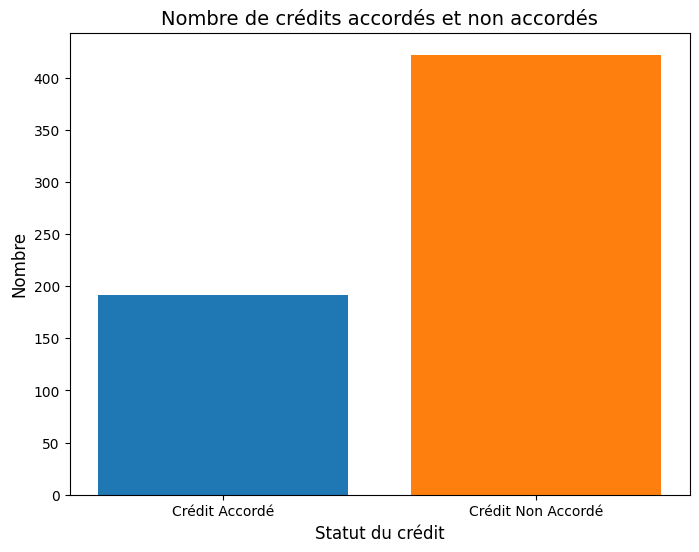

In [21]:
# Nombre de crédits accordés et non accordés
yes_count = target.value_counts()[0]  # Crédit accordé (1)
no_count = target.value_counts()[1]  # Crédit non accordé (0)

# Création du graphique
plt.figure(figsize=(8, 6))
plt.bar(['Crédit Accordé', 'Crédit Non Accordé'], [yes_count, no_count], color=['#1f77b4', '#ff7f0e'])  # Couleurs personnalisées
plt.title("Nombre de crédits accordés et non accordés", fontsize=14)
plt.xlabel("Statut du crédit", fontsize=12)
plt.ylabel("Nombre", fontsize=12)

# Affichage des proportions
yes_proportion = yes_count / len(target)
no_proportion = no_count / len(target)
print(f'Proportion de crédits accordés : {yes_proportion:.2f}')
print(f'Proportion de crédits non accordés : {no_proportion:.2f}')

plt.show()

d:\credit_immobilier_API\env\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


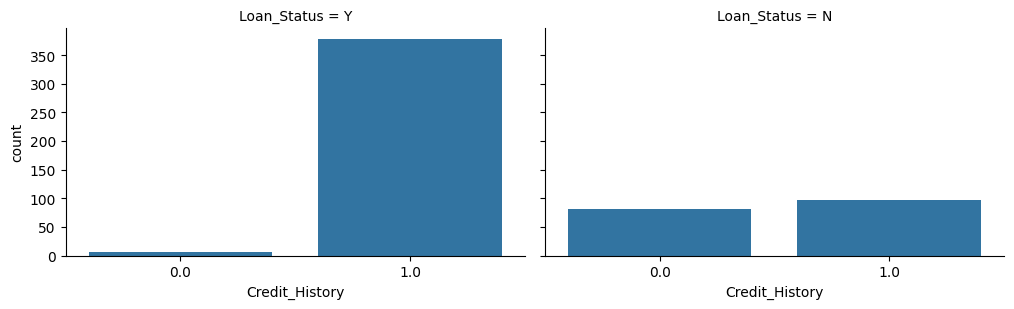

In [22]:
# Credit history
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)  # Remplacez 'size' par 'height'
grid.map(sns.countplot, 'Credit_History')
plt.show()

d:\credit_immobilier_API\env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\credit_immobilier_API\env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


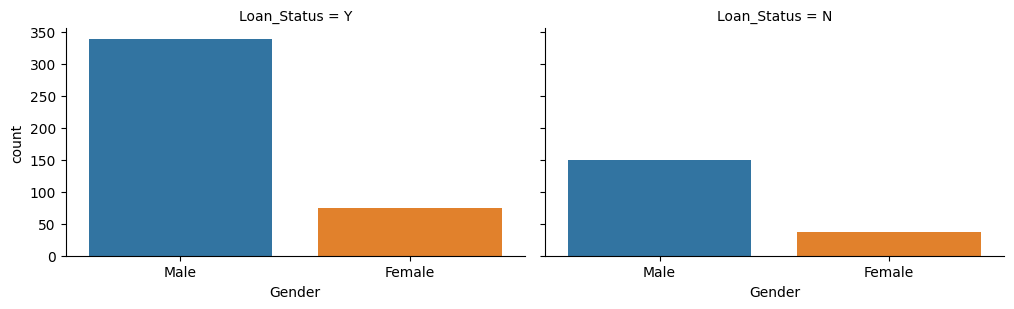

In [23]:
# Répartition par sexe (Gender) en fonction du statut du crédit (Loan_Status)
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)  # Utilisation de 'height' au lieu de 'size'
grid.map(sns.countplot, 'Gender', order=['Male', 'Female'], palette=['#1f77b4', '#ff7f0e'])  # Couleurs personnalisées
plt.show()

d:\credit_immobilier_API\env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\credit_immobilier_API\env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


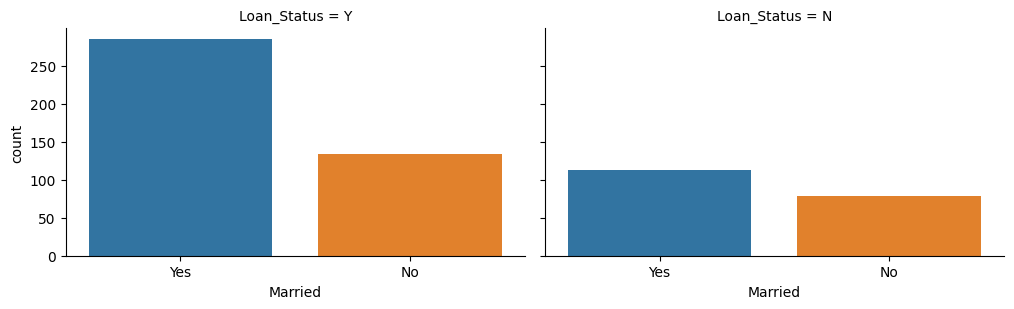

In [24]:
# Répartition des personnes mariées (Married) en fonction du statut du crédit (Loan_Status)
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)  # Utilisation de 'height' au lieu de 'size'
grid.map(sns.countplot, 'Married', order=['Yes', 'No'], palette=['#1f77b4', '#ff7f0e'])  # Couleurs personnalisées
plt.show()

d:\credit_immobilier_API\env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\credit_immobilier_API\env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


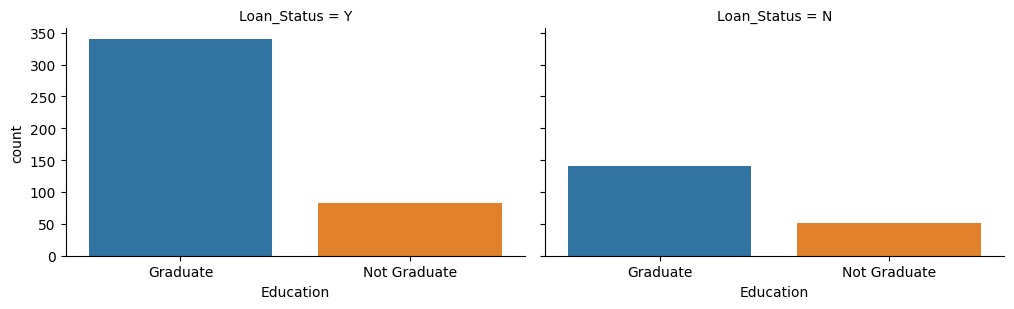

In [25]:
# Répartition par niveau d'éducation (Education) en fonction du statut du crédit (Loan_Status)
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)  # Utilisation de 'height' au lieu de 'size'
grid.map(sns.countplot, 'Education', order=['Graduate', 'Not Graduate'], palette=['#1f77b4', '#ff7f0e'])  # Couleurs personnalisées
plt.show()

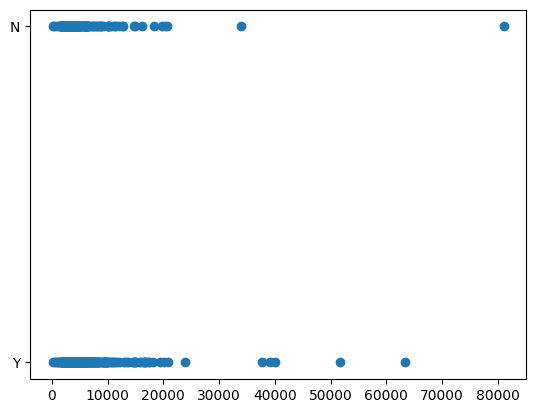

In [26]:
# revenu du demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

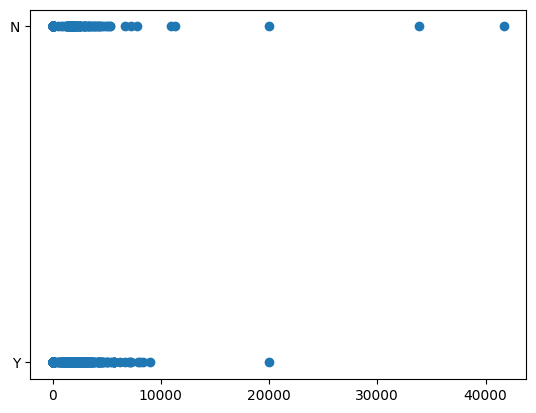

In [27]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [28]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['number'])

# Appliquer groupby et median uniquement sur les colonnes numériques
median_values = numeric_columns.groupby(df['Loan_Status']).median()
print(median_values)

             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                     3833.5              268.0       129.0             360.0   
Y                     3812.5             1239.5       126.0             360.0   

             Credit_History  
Loan_Status                  
N                       1.0  
Y                       1.0  


In [29]:
# Diviser la base de données en une base de données test et d'entrainement
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,y):
  X_train,X_test=X.iloc[train],X.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('y_train taille: ', y_train.shape)
print('y_test taille: ', y_test.shape)

X_train taille:  (491, 11)
X_test taille:  (123, 11)
y_train taille:  (491,)
y_test taille:  (123,)


In [30]:
# On va appliquer tois algorithmes Logisitic Regression, KNN, DecisionTree
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

# La fonction de précision
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'la precision du modèle est: {acc}')

#c'est la fonction d'application des modèles
def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,y_train)
    accu(y_test,model.predict(X_test))
    print('-'*30)

train_test_eval(models,X_train,y_train,X_test,y_test)


LogisticRegression :
la precision du modèle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modèle est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
la precision du modèle est: 0.8455284552845529
------------------------------


d:\credit_immobilier_API\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
X_2=X[['Credit_History','Married','CoapplicantIncome']]

In [32]:
# Diviser la base de données en une base de données test et d'entrainement
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X_2,y):
  X_train,X_test=X_2.iloc[train],X_2.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('y_train taille: ', y_train.shape)
print('y_test taille: ', y_test.shape)

X_train taille:  (491, 3)
X_test taille:  (123, 3)
y_train taille:  (491,)
y_test taille:  (123,)


In [33]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du modèle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modèle est: 0.6991869918699187
------------------------------
DecisionTreeClassifier :
la precision du modèle est: 0.8455284552845529
------------------------------


In [38]:
# Réentraîner le modèle avec X_2
X_2 = X[['Credit_History', 'Married', 'CoapplicantIncome']]
Classifier = LogisticRegression()
Classifier.fit(X_2, y)

# Enregistrer le modèle
pickle.dump(Classifier, open('model.pkl', 'wb'))